# Pruebas de hipotesis

Suponga que dirige una institución educativa privada. Su contrato dice que si sus estudiantes obtienen 110 en el examen final, donde el promedio nacional es 100, usted obtiene una bonificación. Cuando los resultados son significativamente más bajos, pierde su bonificación (porque los estudiantes no son lo suficientemente buenos) y tiene que contratar más maestros; y cuando los resultados son significativamente más altos, también pierde su bonificación (porque ha gastado demasiado dinero en maestros) y tiene que reducir el número de maestros.

En el examen final se obtuvieron los siguientes resultados:

        109.4, 76.2, 128.7, 93.7, 85.6, 117.7, 117.2, 87.3, 100.3, 55.1

cuyo promedio es de 97.1

La pregunta que queremos responder: ¿Es el valor medio de las puntuaciones (97.1) significativamente diferente de 110?

------------------------------------------------------------------------------------------------------------------

## Nivel de significancia, hipotesis nula e hipotesis alternativa

Generalmente, para las pruebas de hipotesis, se acepta un nivel de significancia del 5% ($\alpha=5\%$), lo que significa que se evaluara alrededor de ese 5% si se debe rechazar o no la pregunta. Estamos dispuestos a rechazar  $H_0$ si la probabilidad (p) de hacerlo injustificadamente es igual o menor a $0.05$. Su notación a menudo se encuentra como: $p\leq0.05$.  Este nivel es bastante común en las ciencias humanas, en cambio en otras disciplinas de las ciencias exactas y médicas por ejemplo, a veces se opera con $p\leq0.01$ o $p\leq0.001$, lo que significa que se acepta rechazar injustificadamente  $H_0$ una vez en cien o una vez en mil respectivamente.

El procedimiento normal es establecer antes que nada un hipotesis nula ($H_0$), y una hipotesis alternativa ($H_1$). La prueba de hipotesis utilizara el nivel de significancia para aceptar o rechazar la $H_0$.

$H_0$: El promedio obtenido no es significativamente diferente a 110.

$H_1$: El promedio obtenido si es significativamente diferente a 110.

-----------------------------------------------------------------------------------------------------------------

$H_0: \mu = 110$

$H_1: \mu \neq 110$

Lo que temenos que hacer es aplicar un test estadístico y calcular la probabilidad de obtener las observaciones que hemos obtenido y si esa probabilidad es muy baja, refutamos  $H_0$ a favor de una de las alternativas.

In [1]:
notas = [109.4, 76.2, 128.7, 93.7, 85.6, 117.7, 117.2, 87.3, 100.3, 55.1]
size = len(notas)
notas, size

([109.4, 76.2, 128.7, 93.7, 85.6, 117.7, 117.2, 87.3, 100.3, 55.1], 10)

In [2]:
from scipy import stats
stats.shapiro(notas)

ShapiroResult(statistic=0.9724767208099365, pvalue=0.9128104448318481)

In [3]:
# Usando t de student
tsd = stats.t(size-1)
tnorm = (110 - np.mean(notas))/stats.sem(notas)
p = 2*tsd.sf(tnorm)
print(f'{np.round(p*100, 2)}%')

9.95%


## Generalizacion y aplicaciones

Basado en el ejemplo anterior, el procedimiento general para las pruebas de hipótesis se puede describir como sigue:

* Se extrae una muestra aleatoria de una población. (En nuestro ejemplo, la muestra aleatoria son nuestras puntuaciones).
* Se formula una hipótesis nula. ("Hay una diferencia nula entre la media de la población y el valor de 110").
* Se calcula una estadística de prueba, de la cual conocemos la distribución de probabilidad. (Aquí la media muestral, ya que sabemos que el valor medio de las muestras de una distribución normal sigue la distribución t).
* Comparando el valor observado del estadístico (aquí el valor t obtenido) con la distribución correspondiente (la distribución t), podemos encontrar la probabilidad de que un valor tan extremo o más extremo que el observado se encuentre por casualidad. Este es el llamado _valor p_.
* Si el valor p es $p \le 0.05$, rechazamos la hipótesis nula y hablamos de una diferencia estadísticamente significativa. Si se obtiene un valor de $p \le 0.001$, el resultado se suele llamar muy significativo. La región crítica de una prueba de hipótesis es el conjunto de todos los resultados que hacen que se rechace la hipótesis nula.

En otras palabras, el valor p indica qué tan probable es obtener un valor tan extremo o más extremo solo por casualidad, si la hipótesis nula es cierta.

El valor con el que se compara el valor p es el nivel de significancia y, a menudo, se indica con la letra $\alpha$. El nivel de significancia es una elección del usuario y normalmente se establece en $0.05$.
Esta forma de proceder para probar una hipótesis se llama inferencia estadística.
Recuordar que p solo indica la probabilidad de obtener un cierto valor para el estadístico de prueba si la hipótesis nula es verdadera, ¡nada más!

Y tenga en cuenta que ocurren eventos improbables, aunque no con mucha frecuencia.

Por ejemplo, en 1980 una mujer llamada Maureen Wilcox compró boletos tanto para la lotería de Rhode Island como para la lotería de Massachusetts. Y obtuvo los números correctos para ambas loterías. Desafortunadamente para ella, eligió todos los números correctos para Massachusetts en su boleto de Rhode Island, y todos los números correctos para Rhode Island en su boleto de Massachusetts. Visto estadísticamente, el valor p para tal evento sería extremadamente pequeño, pero sucedió de todos modos.

**Ejemplo 1** Comparemos el peso de dos grupos de sujetos. La hipótesis nula es que existe una diferencia nula en el peso entre los dos grupos. Si una comparación estadística del peso produce un valor p de 0.03, esto significa que la probabilidad de que la hipótesis nula sea correcta es 0.03, o 3%. Dado que esta probabilidad es menor que 0.05, decimos que "hay una diferencia significativa entre el peso de los dos grupos".

**Ejemplo 2** Si queremos comprobar el supuesto de que el valor medio de un grupo es 7, entonces la hipótesis nula correspondiente sería: "Suponemos que hay una diferencia nula entre el valor medio de nuestra población y el valor 7".

**Ejemplo 3 (Prueba de normalidad)** Si verificamos si una muestra de datos está distribuida normalmente, la hipótesis nula es que “no hay diferencia entre mis datos y los datos distribuidos normalmente”: aquí un valor p grande indica que los datos son de hecho ¡Normalmente distribuidos!

## Interpretacion del p valor

`Un valor de p < 0.05 para la hipótesis nula debe interpretarse de la siguiente manera: Si la hipótesis nula es verdadera, la probabilidad de encontrar un estadístico de prueba tan extremo o más extremo que el observado es menor al 5%. Esto no es lo mismo que decir que la hipótesis nula es falsa, y menos aún, que una hipótesis alternativa es verdadera.`

Establecer un valor p por sí solo no es suficiente para el análisis estadístico de datos. Además, también se deben dar los intervalos de confianza para los parámetros bajo investigación.
Para reducir los errores en la interpretación de datos, la investigación a veces se divide en _investigación exploratoria_ e _investigación confirmatoria_.

<span class="burk">EJERCICIOS</span>

**1.** Una empresa de neumáticos afirma que una nueva gama en promedio dura al menos 28.000 km. Las pruebas con 64 neumáticos dan como resultado una duración media de 27.800 km, con una desviación estándar de 1.000 km.
Bajo la normalidad de los neumáticos, se pide:

a) Comprobar si hay evidencia suficiente para rechazar la afirmación de la empresa, con un nivel de significación del 5%

b) ¿Cuál es el p‐valor?

In [6]:
# H0: mu >= 28000; H1: < 28000
xbar = 27800
mu = 28000
s = 1000
n = 64
znorm = (mu - xbar)/(s/np.sqrt(n))
znorm

1.6

In [7]:
normal = stats.norm()
normal.sf(znorm)

0.054799291699557974

<IPython.core.display.Javascript object>


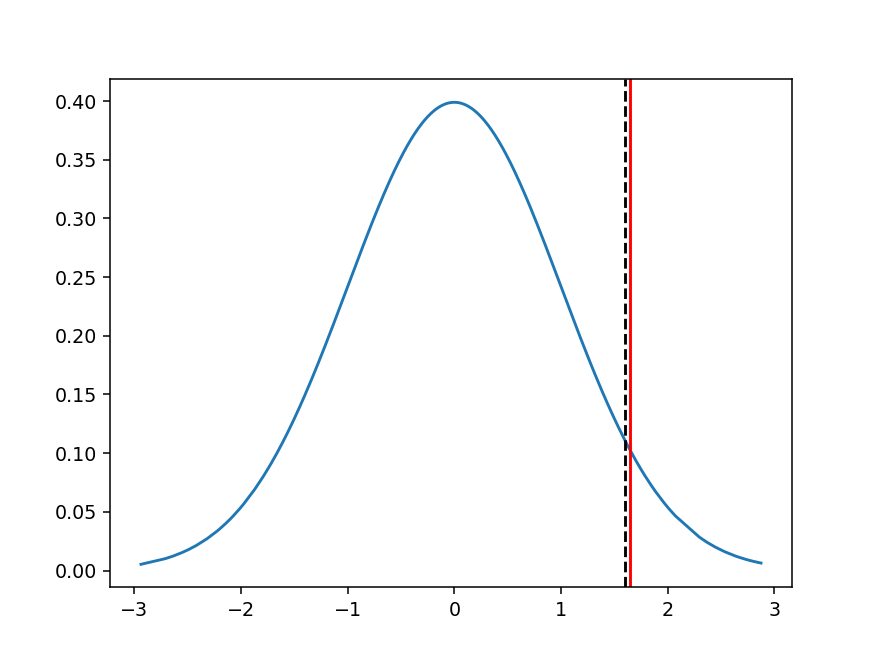

In [12]:
x = normal.rvs(1000)
y = normal.pdf(np.sort(x))
import matplotlib.pyplot as plt
%matplotlib notebook
fig, ax = plt.subplots()
ax.plot(np.sort(x), y)
plt.axvline(znorm, ymin = 0, ymax = 1, c = 'k', linestyle="--")
plt.axvline(normal.ppf(0.95), ymin = 0, ymax = 1, c = 'r', linestyle="-")

**2.** El propietario de un autómovil sospecha que su vehículo tiene un consumo medio de combustible en carretera superior a los 5,6 litros /100 km, que es lo que el fabricante indica en su publicidad.

Para apoyar empíricamente su sospecha observa el consumo medio en 11 viajes seleccionados aleatoriamente entre todos los que realiza en el año, obteniendo los siguientes resultados:

    6,1 6,5 5,1 6 5,9 5,2 5,8 5,3 6,2 5,9 6,3
    
Se pide:

a) ¿Están fundadas las sospechas del propietario a un nivel de significacion del 1%?

b) Calcula el p‐valor.

In [14]:
# H0: mu > 5.6; H1: mu <= 5.6
consumo = [6.1, 6.5, 5.1, 6, 5.9, 5.2, 5.8, 5.3, 6.2, 5.9, 6.3]
print(np.mean(consumo))
n = 11
tsd = stats.t(n - 1)
tnorm = (np.mean(consumo)-5.6)/stats.sem(consumo)
tsd.sf(tnorm)

5.845454545454547


0.0540084500519756

In [ ]:
import numpy as np
from scipy import stats

In [ ]:
consumo = [6.1, 6.5, 5.1, 6, 5.9, 5.2, 5.8, 5.3, 6.2, 5.9, 6.3]
stats.shapiro(consumo)

In [ ]:
n = len(consumo)
xbar = np.mean(consumo)
sem = stats.sem(consumo)
tsd = stats.t(n - 1)

In [ ]:
znorm = (xbar-5.6)/sem
p = tsd.sf(znorm)
p

**3.**  Un banco quiere analizar si las comisiones que cobra a sus clientes por operaciones en el mercado bursátil difieren significativamente de las que cobra la competencia, cuya media es de 12 euros mensuales con una desviación estándar de 4.3 euros. Este banco toma una muestra de 64 operaciones bursátiles y observa que la comisión promedio es de 13.6 euros. Contrastar, al nivel de significación del 5%, que este banco no difiere significativamente en el cobro de comisiones por
operaciones en la Bolsa con respecto a la competencia.

In [17]:
# H0: mu = 12; H1: mu != 12
mu = 12
sigma = 4.3
xbar = 13.6
n = 64
znorm = (xbar - mu)/(sigma/np.sqrt(n))
normal = stats.norm()
2*normal.sf(znorm)

0.002913269819476166

## Tipos de error

En las pruebas de hipotesis es posible caer en alguno de los siguientes errores:

### Errores de tipo 1

Los errores de tipo I son errores en los que el resultado es significativo a pesar de que la hipótesis nula es cierta. La probabilidad de un error de tipo I se indica comúnmente con $\alpha$, y se establece antes del inicio del análisis de datos. En el control de calidad, un error de Tipo I se denomina riesgo del productor, porque rechaza un artículo producido a pesar de que cumple con los requisitos reglamentarios.

Un error de tipo I sería un diagnóstico de cáncer (resultado de prueba "positivo"), aunque el sujeto esté sano.

### Errores de tipo 2 

Los errores de tipo II son errores en los que el resultado no es significativo, a pesar de que la hipótesis nula es falsa. En el control de calidad, un error de Tipo II se denomina riesgo del consumidor, porque el consumidor obtiene un artículo que no cumple con los requisitos reglamentarios.

Un error de tipo II sería un diagnóstico "saludable" (resultado de prueba "negativo"), aunque el sujeto tenga cáncer. 

## Sensitividad y especificidad

Algunos de los términos más confusos en el análisis estadístico son sensibilidad y especificidad. Temas relacionados son el valor predictivo positivo ( _PPV_ ) y el valor predictivo negativo ( _NPV_ ) de las pruebas estadísticas. El siguiente diagrama muestra cómo se relacionan los cuatro:

**Sensibilidad** También llamada potencia. Proporción de verdaderos positivos respecto  a todos los de condicion positiva(= probabilidad de una prueba positiva, dado que el paciente está enfermo). _Es la capacidad de la prueba para detectar la enfermedad. La sensibilidad nos permite conocer qué probabilidad hay de que en alguien que tiene el diagnóstico, la prueba sea positiva._

**Especificidad** Proporción de verdaderos negativos respecto a todos los de condicion negativa (= probabilidad de una prueba negativa, dado que el paciente se encuentra bien). _Es la capacidad de la prueba para detectar a los sanos. La especificidad nos permite conocer qué probabilidad hay de que en las personas sanas, la prueba sea negativa/normal._

**Valor predictivo positivo (VPP)** Proporcion de pacientes con verdaderos resultados positivos respecto a todos los resultados positivos.

**Valor predictivo negativo (VPN)** Proporción de pacientes con verdaderos resultados de prueba negativos respecto a todos los resultados negativos. 

Ante una prueba, la más valida será la que tenga mayor sensibilidad y especificidad. Si hay que elegir entre una y otra, elegiremos una prueba con alta sensibilidad cuando queramos detectar enfermedades graves, tratables o que los falsos positivos (que seguro existirán) no supongan una adversidad vital muy relevante. Elegiremos una prueba con alta especificidad cuando la enfermedad buscada sea difícil de tratar (evitaremos diagnosticar erróneamente) y/o el hecho de conocer que se padece una enfermedad tenga una importancia relevante para la persona, su entorno o el sistema.

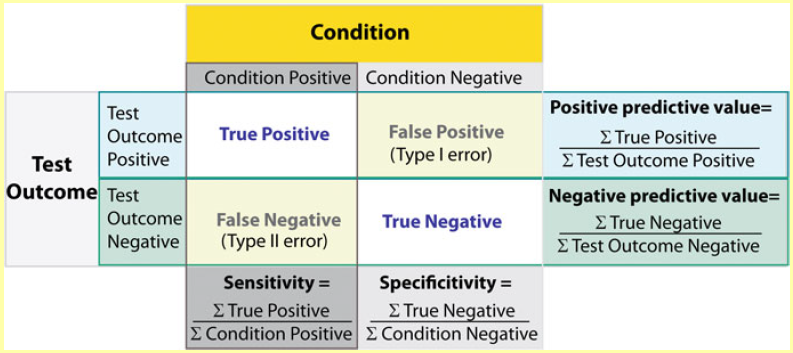

Por ejemplo, las pruebas de embarazo tienen una alta sensibilidad: cuando una mujer está embarazada, la probabilidad de que la prueba sea positiva es muy alta.

Por el contrario, un indicador de un ataque con armas atómicas en la Casa Blanca debería tener una especificidad muy alta: si no hay ningún ataque, la probabilidad de que el indicador sea positivo debería ser muy, muy pequeña.

Si bien la sensibilidad y la especificidad caracterizan una prueba y son independientes de la prevalencia, no indican qué parte de los pacientes con resultados anormales de la prueba son realmente anormales. Esta información es proporcionada por el valor predictivo positivo / negativo (PPV / NPV). Estos son los valores relevantes para un médico que diagnostica a un paciente:

cuando un paciente tiene un resultado positivo en la prueba, ¿qué probabilidad hay de que el paciente esté realmente enfermo?

Desafortunadamente, estos valores se ven afectados por la prevalencia de la enfermedad. La **prevalencia** de una enfermedad indica cuántas de cada 100.000 personas se ven afectadas por ella; por el contrario, la **incidencia** da el número de casos recién diagnosticados por cada 100.000 personas. En resumen, necesitamos conocer la prevalencia de la enfermedad, así como el PPV / NPV de una prueba para proporcionar una interpretación sensata de los resultados de las pruebas médicas.

Tomemos, por ejemplo, una prueba en la que un resultado positivo implica una probabilidad del 50% de tener una determinada afección médica. Si la mitad de la población tiene esta afección, un resultado positivo de la prueba no le dice nada al médico. Pero si la afección es muy rara, un resultado positivo de la prueba indica que el paciente tiene un cincuenta por ciento de posibilidades de tener esta rara afección, una información que es muy valiosa.

La siguiente figura muestra cómo la prevalencia de una enfermedad afecta la interpretación de los resultados del diagnóstico, con una prueba con una especificidad y sensibilidad determinadas: una alta prevalencia de la enfermedad aumenta el PPV de la prueba, pero disminuye el NPV; y una baja prevalencia hace exactamente lo contrario.

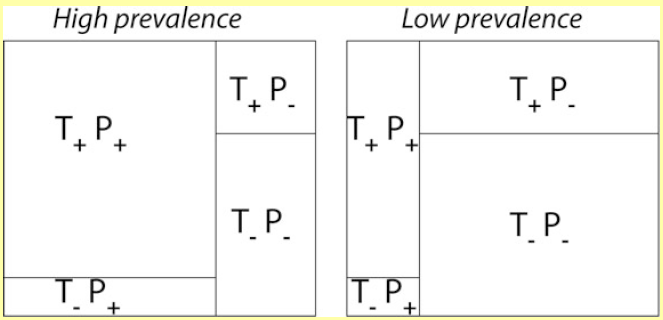
_Efecto de la prevalencia sobre el VPP y el VPN. "T" significa "prueba" y "P" para "paciente"._

Ejemplo 
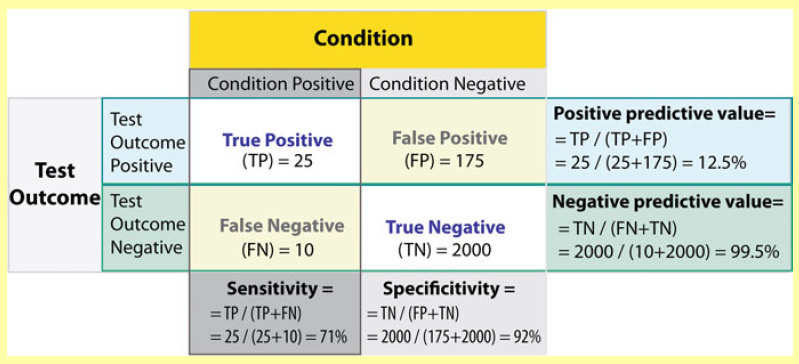

<span class="burk">EJERCICIOS</span>

En la siguiente tabla se muestran los resultados de un estudio para evaluar la utilidad de una tira reactiva para el diagnóstico de infección urinaria para 350 pacientes.

    ___________________________________________________
    Tira reactiva	Con infección	Sin infección
    ___________________________________________________
        Positiva	      60	         80
    ---------------------------------------------------
        Negativa	      10	        200
    ___________________________________________________
  
**1.** Calcular e interpretar sensibilidad y especificidad ¿consideraría usted que la tira reactiva es una buena prueba diagnóstica? 

**2.** Calcular e interpretar los valores predictivos positivo y negativo ¿consideraría usted que la tira reactiva es una buena prueba diagnóstica? 

**3.** Si a partir de un estudio de prevalencia (o transversal) realizado previamente, conociésemos que la verdadera prevalencia de infección urinaria en la población es tan sólo del 2% ¿cómo se verían afectados los valores predictivos? ¿consideraría usted ahora que la tira reactiva es una buena prueba diagnóstica?


In [3]:
sensibilidad = 60/(60+10)
especificidad = 200/(200+80)
sensibilidad*100, especificidad*100

(85.71428571428571, 71.42857142857143)

In [4]:
ppv = 60/(60+80)
pvn = 200/(200+10)
ppv*100, pvn*100

(42.857142857142854, 95.23809523809523)